# Distribution of GAIA non single star indicators in different populations

Comparing the distributions of `sepsi`, `RUWE`, and `e_RV` of
- Multi-star systems (doubly eclipsing systems as a proxy)
- binary systems (eclipsing binaries as a proxy)
- general population

In [1]:
import numpy as np
import pandas as pd

from IPython.display import display, HTML

import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-white")

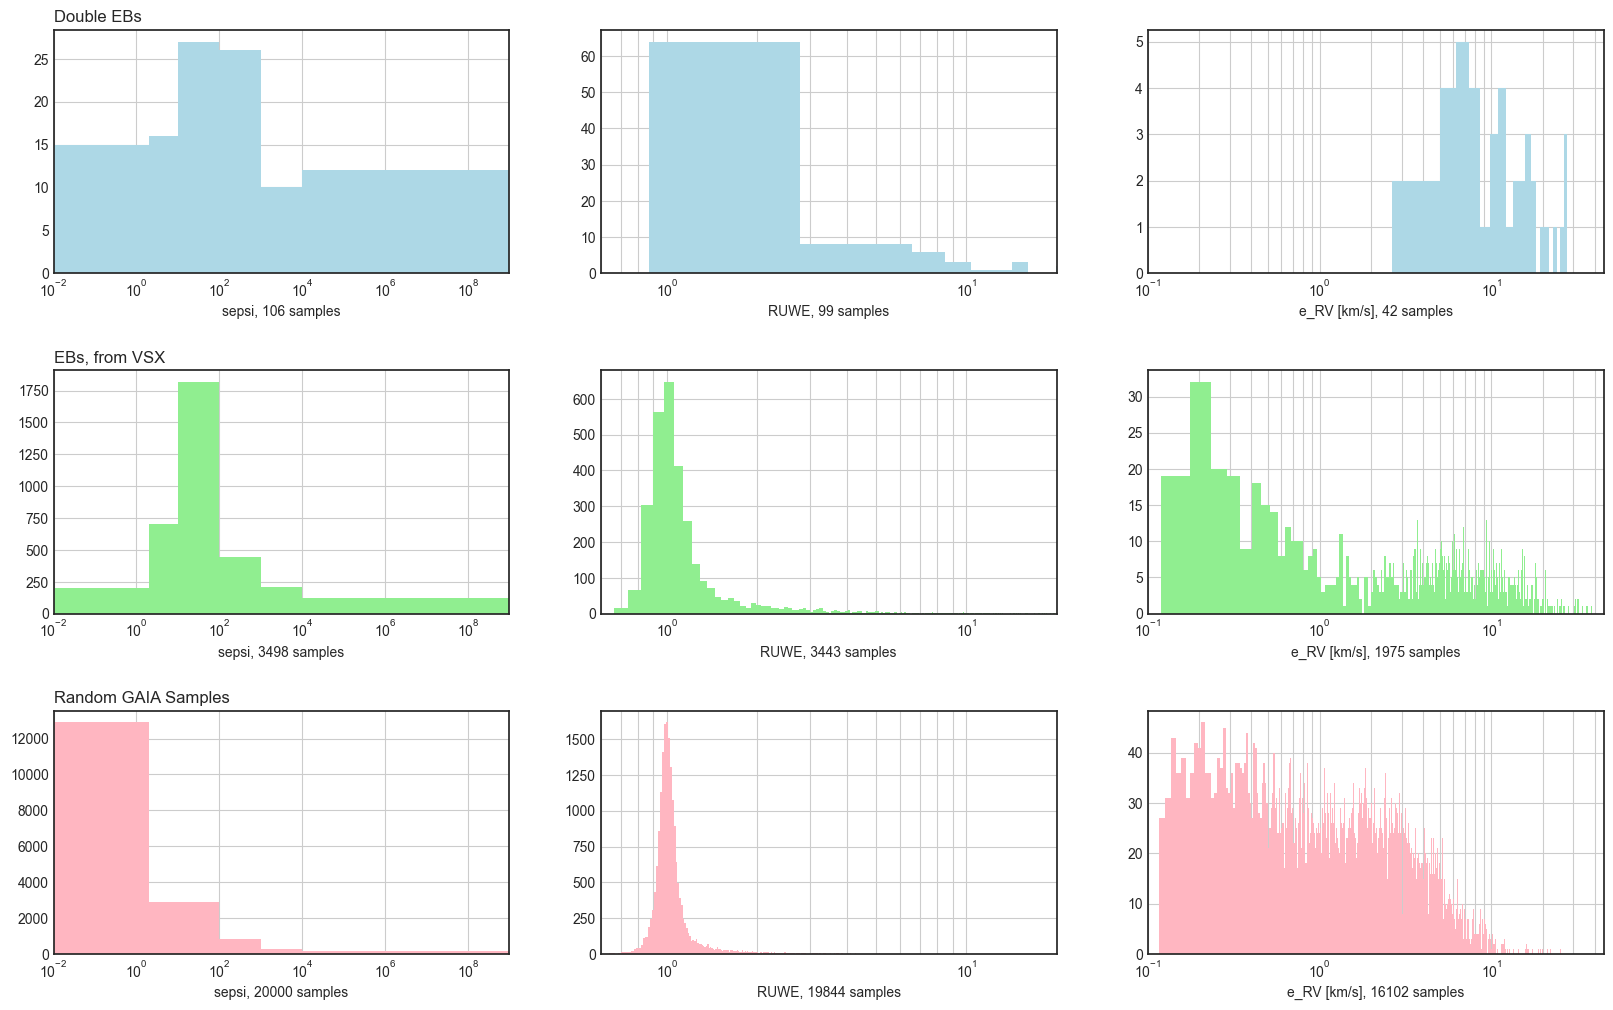

In [2]:
def do_plots(df, title, color="lightblue", axs=None):
    axs[0].set_title(title, loc="left")
    bins = int(len(df) / 5)

    df_f = df[pd.notna(df["sepsi"])]
    ax = df_f["sepsi"].hist(bins=[0, 2, 10, 100, 1000, 10000, 1e9], ax=axs[0], color=color);
    ax.set_xscale("log")
    ax.set_xlabel(f"sepsi, {len(df_f)} samples")
    ax.grid(visible=True, which="both", axis="x")  # show minor grid lines too
    ax.set_xlim(0.01, 1e9)

    df_f = df[pd.notna(df["RUWE"])]
    ax = df_f["RUWE"].hist(bins=bins, ax=axs[1], color=color);
    ax.set_xscale("log")
    ax.set_xlabel(f"RUWE, {len(df_f)} samples")
    ax.grid(visible=True, which="both", axis="x")  # show minor grid lines too
    ax.set_xlim(0.6, 20)

    df_f = df[pd.notna(df["e_RV"])]
    ax = df_f["e_RV"].hist(bins=bins, ax=axs[2], color=color);
    ax.set_xscale("log")
    ax.set_xlabel(f"e_RV [km/s], {len(df_f)} samples")
    ax.grid(visible=True, which="both", axis="x")  # show minor grid lines too
    ax.set_xlim(0.1, 45)

    return axs


num_datasets = 3
fig, axs = plt.subplots(1 * num_datasets, 3, figsize=(20, 4 * num_datasets))  # sharex='col'

df_quad = pd.read_csv("catalog_samples/tess_double_eb_samples_with_gaia_dr3.csv")
do_plots(df_quad, "Double EBs", axs=axs[0], color="lightblue");

df_eb = pd.read_csv("catalog_samples/pht_vsx_eb_samples_with_gaia_dr3.csv")
df_eb.rename(columns={"GAIA_RUWE": "RUWE", "GAIA_sepsi": "sepsi", "GAIA_e_RV": "e_RV"}, inplace=True)
do_plots(df_eb, "EBs, from VSX", axs=axs[1], color="lightgreen");

df_gaia = pd.read_csv("catalog_samples/gaia_dr3_20k_samples.ecsv", comment="#")  # nrows=1000
df_gaia.rename(columns={"astrometric_excess_noise_sig": "sepsi", "ruwe": "RUWE","radial_velocity_error": "e_RV"}, inplace=True)
do_plots(df_gaia, "Random GAIA Samples", axs=axs[2], color="lightpink");

plt.subplots_adjust(hspace=0.4)  # extra space between rows for the titles

In [3]:
# print proportion of VSX eclipsing binaries that meet some of the NSS proxy indicators
df = df_eb[["tic_id", "VSX_Name", "VSX_Type", "GAIA_DR3Name", "RUWE", "sepsi", "e_RV"]]
print("RUWE < 1.4:", len(df[df["RUWE"] < 1.4]), len(df[df["RUWE"] > 0]))
print("sepsi < 2:", len(df[df["sepsi"] < 2]), len(df[df["sepsi"] > 0]))
print("e_RV < 1.5:", len(df[df["e_RV"] < 1.5]), len(df[df["e_RV"] > 0]))
print("any of them:", len(df[(df["RUWE"] < 1.4) & (df["sepsi"] < 2) & (df["e_RV"] < 1.5)]), len(df[(df["RUWE"] > 0) | (df["sepsi"] > 0 ) | (df["e_RV"] > 0)]))

RUWE < 1.4: 2540 3443
sepsi < 2: 204 3380
e_RV < 1.5: 257 1975
any of them: 13 3498


In [26]:
[c for c in df_eb.columns if "GAIA" in c.upper()]
# df_eb[["tic_id", "VSX_Is_EB", "VSX_Name", "VSX_Period"]]

['GAIA_DR3Name',
 'GAIA_RAdeg',
 'GAIA_DEdeg',
 'GAIA_errHalfMaj',
 'GAIA_errHalfMin',
 'GAIA_errPosAng',
 'GAIA_SolID',
 'GAIA_Source',
 'GAIA_RandomI',
 'GAIA_e_RAdeg',
 'GAIA_e_DEdeg',
 'GAIA_Plx',
 'GAIA_e_Plx',
 'GAIA_RPlx',
 'GAIA_PM',
 'GAIA_pmRA',
 'GAIA_e_pmRA',
 'GAIA_pmDE',
 'GAIA_e_pmDE',
 'GAIA_RADEcor',
 'GAIA_RAPlxcor',
 'GAIA_RApmRAcor',
 'GAIA_RApmDEcor',
 'GAIA_DEPlxcor',
 'GAIA_DEpmRAcor',
 'GAIA_DEpmDEcor',
 'GAIA_PlxpmRAcor',
 'GAIA_PlxpmDEcor',
 'GAIA_pmRApmDEcor',
 'GAIA_NAL',
 'GAIA_NAC',
 'GAIA_NgAL',
 'GAIA_NbAL',
 'GAIA_gofAL',
 'GAIA_chi2AL',
 'GAIA_epsi',
 'GAIA_Solved',
 'GAIA_APF',
 'GAIA_nueff',
 'GAIA_pscol',
 'GAIA_e_pscol',
 'GAIA_RApscolCorr',
 'GAIA_DEpscolCorr',
 'GAIA_PlxpscolCorr',
 'GAIA_pmRApscolCorr',
 'GAIA_pmDEpscolCorr',
 'GAIA_MatchObsA',
 'GAIA_Nper',
 'GAIA_amax',
 'GAIA_MatchObs',
 'GAIA_IPDgofha',
 'GAIA_IPDgofhp',
 'GAIA_IPDfmp',
 'GAIA_IPDfow',
 'GAIA_Dup',
 'GAIA_o_Gmag',
 'GAIA_FG',
 'GAIA_e_FG',
 'GAIA_RFG',
 'GAIA_Gmag',
 'GAIA_e

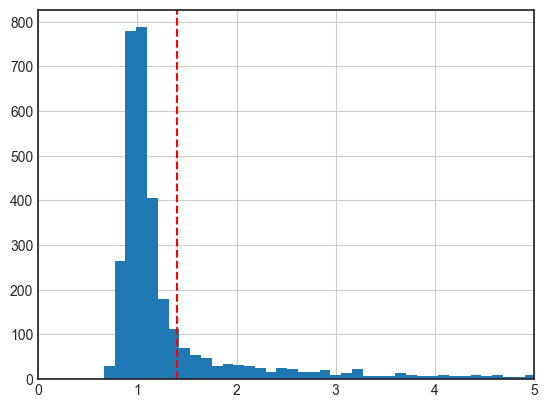

In [15]:
ax = df_eb["RUWE"].hist(bins=500);
ax.set_xlim(0, 5);
ax.axvline(1.4, color="red", linestyle="--");

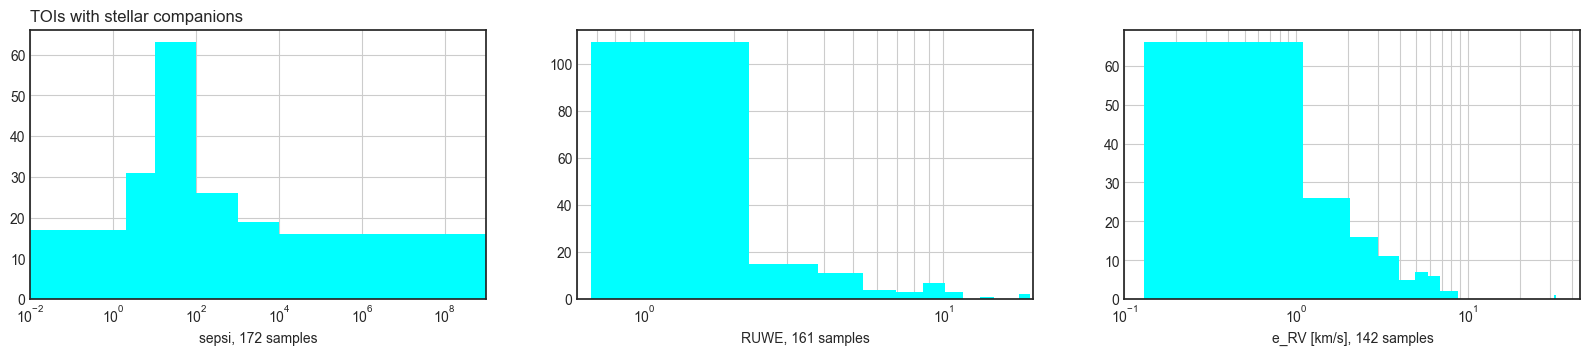

In [119]:
# For TOIs with stellar companions

df_toi_w_comp = pd.read_csv("catalog_samples/toi_w_stellar_companion_samples_with_gaia_dr3.csv")

fig, axs = plt.subplots(1, 3, figsize=(20, 3.5))
do_plots(df_toi_w_comp, "TOIs with stellar companions", axs=axs, color="cyan");

In [ ]:
# Scratch: get Gaia DR3 parameters for TOIs with stellar companions

_df = pd.read_csv("catalog_samples/exofop_stellarcomp.psv", delimiter="|")  # from ExoFOP
# get a list of TIC IDs to be fed to Vizier
# Vizier can't accept too many of them. 200 seems to work.
",".join(_df[pd.notna(_df["TOI"])]["TIC ID"].unique().astype(str)[:200])

# then get GAIA DR2 IDs from
#   https://vizier.cds.unistra.fr/viz-bin/VizieR-3?-source=IV/39/tic82
# use Gaia DR2 IDs to query Gaia DR3 data
#  https://vizier.cds.unistra.fr/viz-bin/VizieR-3?-source=I/355/gaiadr3

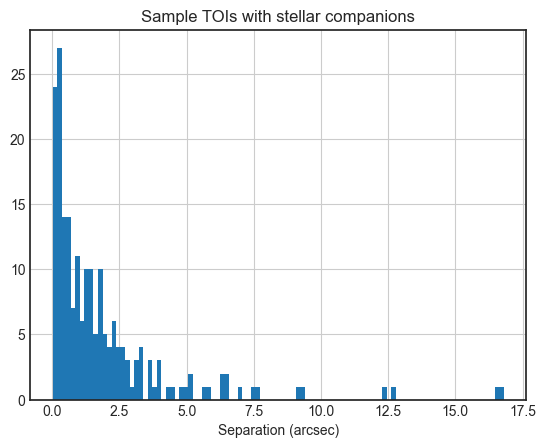

In [13]:
tics_stellarcomp = _df[pd.notna(_df["TOI"])]["TIC ID"].unique()[:200]

_df2 = _df[["TIC ID", "Separation (arcsec)"]]
_df2 = _df2[_df2["TIC ID"].isin(tics_stellarcomp)]
# a TIC could have multiple entries in the csv for a companion.
# Here we assume a TIC have at most 1 actual companion only.
_df2 = _df2.groupby(by="TIC ID", ).mean()

ax = _df2["Separation (arcsec)"].hist(bins=100);
ax.set_xlabel("Separation (arcsec)");
ax.set_title("Sample TOIs with stellar companions");